<a href="https://colab.research.google.com/github/Armin-Abdollahi/Signal-Processing/blob/main/MNE_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### MNE Tutorial

In [1]:
from google.colab import drive
drive.mount('../content/drive')

Mounted at ../content/drive


In [2]:
!pip install mne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 36.7 MB/s eta 0:00:00


In [3]:
import mne
import matplotlib.pyplot as plt

In [17]:
image_dir="/content/drive/MyDrive/BCI_Database/hKFUPB20.cnt"

In [18]:
raw = mne.io.read_raw_cnt(image_dir, preload=True)

Reading 0 ... 210790  =      0.000 ...  1053.950 secs...


<ipython-input-18-aa947c0da253>:1: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw = mne.io.read_raw_cnt(image_dir, preload=True)


In [6]:
dir(raw)

['__class__',
 '__contains__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_annotations',
 '_cals',
 '_check_bad_segment',
 '_comp',
 '_cropped_samp',
 '_data',
 '_dtype',
 '_dtype_',
 '_extra_attributes',
 '_filenames',
 '_first_samps',
 '_first_time',
 '_get_buffer_size',
 '_get_channel_positions',
 '_getitem',
 '_handle_tmin_tmax',
 '_init_kwargs',
 '_last_samps',
 '_last_time',
 '_orig_units',
 '_parse_get_set_params',
 '_pick_drop_channels',
 '_pick_projs',
 '_preload_data',
 '_projector',
 '_projectors',
 '_raw_extras',
 '_raw_lengths',
 '_read_comp_grade',
 '_read_picks',
 '_read_segment',

In [7]:
raw.crop?

In [8]:
raw.filter?

In [9]:
raw.filter(1,20)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Measurement date,Unknown
Experimenter,Unknown
Participant,X
Digitized points,Not available
Good channels,32 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,512.00 Hz
Highpass,1.00 Hz
Lowpass,20.00 Hz


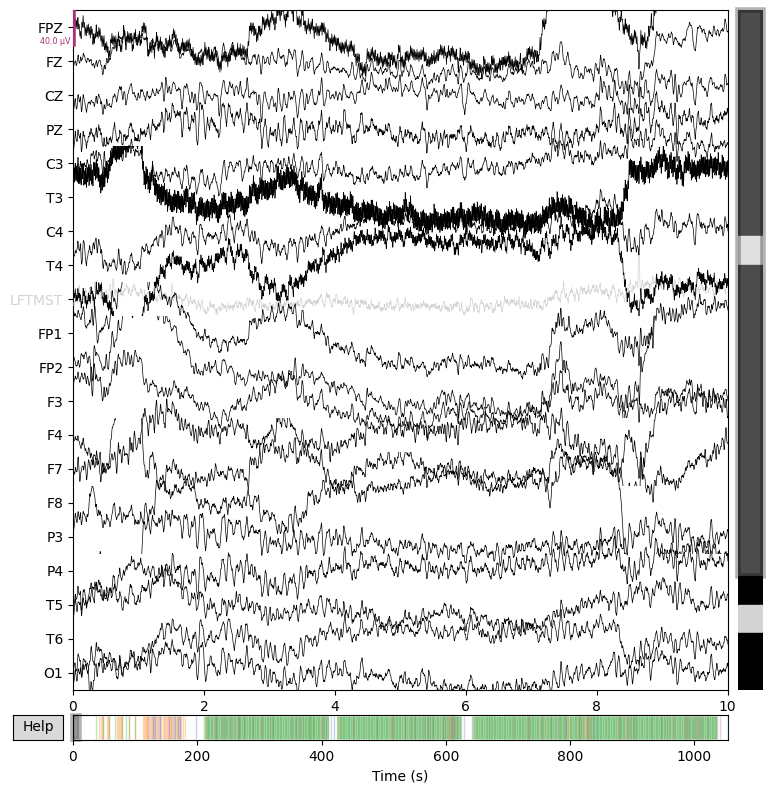

In [19]:
raw.plot();

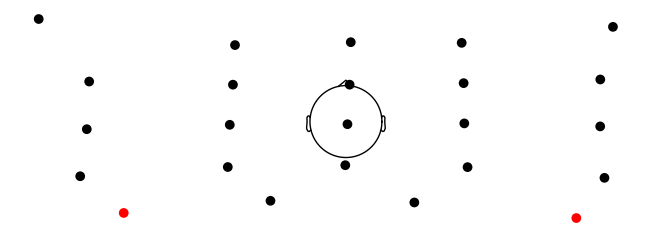

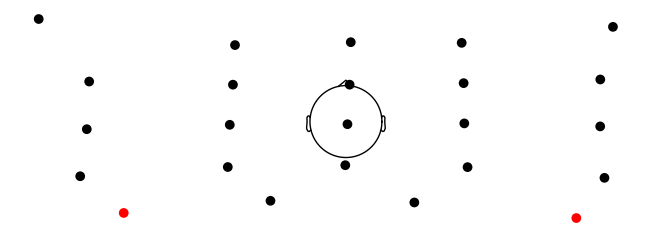

In [20]:
raw.plot_sensors(ch_type='eeg')

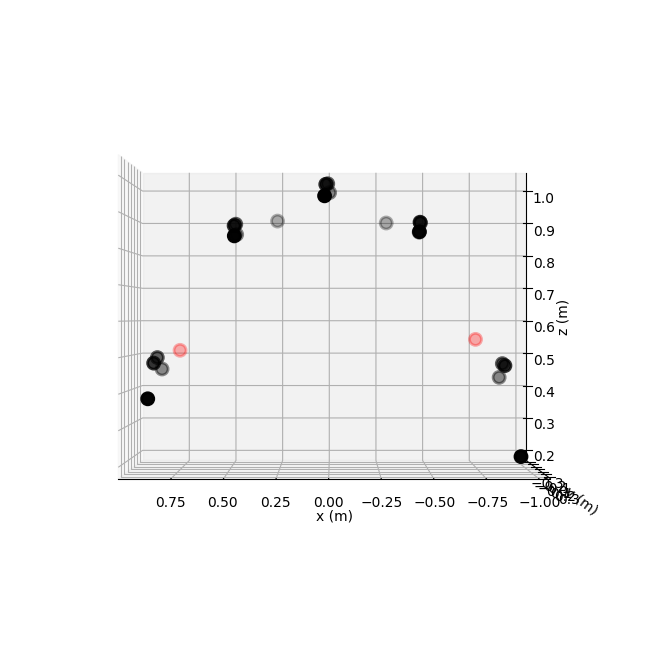

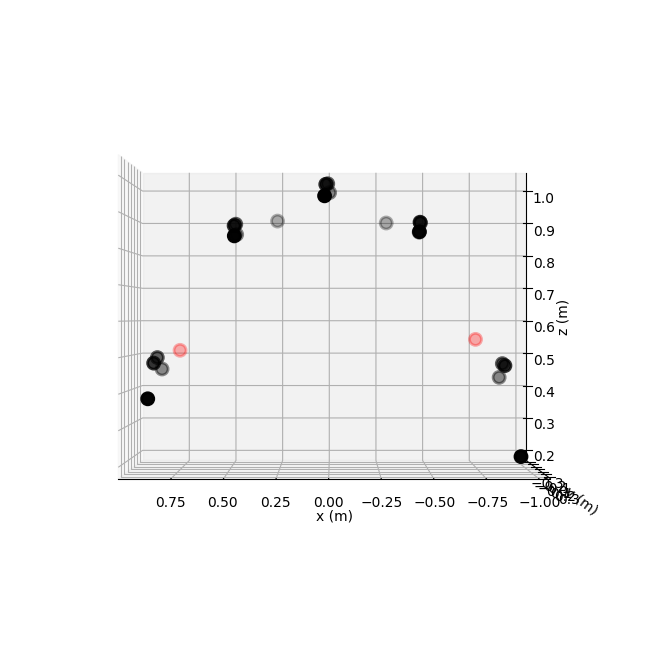

In [21]:
raw.plot_sensors(kind='3d', ch_type='eeg')

In [55]:
raw_eeg = raw.copy().pick_types(meg=False, eeg=True, eog=True, exclude=[])
len(raw_eeg.ch_names)

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


24

In [56]:
raw_eeg.info

<Info | 10 non-empty values
 bads: 2 items (LFTMST, RHTMST)
 ch_names: FPZ, FZ, CZ, PZ, C3, T3, C4, T4, LFTMST, FP1, FP2, F3, F4, F7, ...
 chs: 24 EEG
 custom_ref_applied: False
 dig: 27 items (3 Cardinal, 24 EEG)
 highpass: 1.0 Hz
 lowpass: 20.0 Hz
 meas_date: unspecified
 nchan: 24
 projs: []
 sfreq: 200.0 Hz
 subject_info: 5 items (dict)
>

In [58]:
raw_eeg_cropped = raw_eeg.copy().crop(tmax=100)
raw_eeg_cropped.times[-1]

100.0

In [59]:
raw_eeg_cropped.load_data()

<RawCNT | hKFUPB20.cnt, 24 x 20001 (100.0 s), ~3.7 MB, data loaded>

In [60]:
raw_eeg_cropped_filtered = raw_eeg_cropped.filter(l_freq=0.1, h_freq=40)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 6601 samples (33.005 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


In [61]:
raw_eeg_cropped.load_data()
raw_eeg_cropped_filtered = raw_eeg_cropped.copy().filter(l_freq=0.1, h_freq=40)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 6601 samples (33.005 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 10.240 (s)
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 10.240 (s)


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


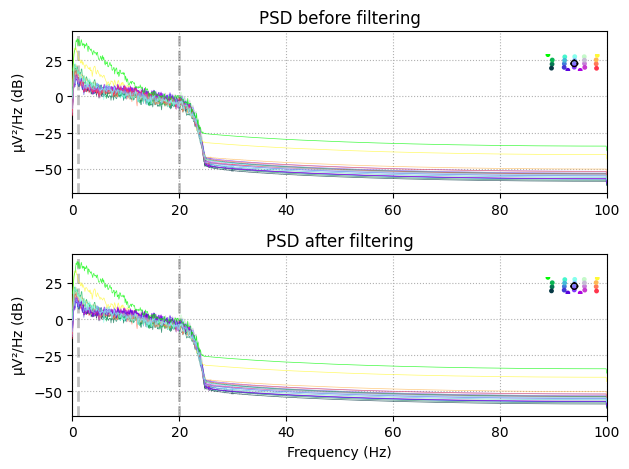

In [63]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2)

raw_eeg_cropped.plot_psd(ax=ax[0], show=False)
raw_eeg_cropped_filtered.plot_psd(ax=ax[1], show=False)

ax[0].set_title('PSD before filtering')
ax[1].set_title('PSD after filtering')
ax[1].set_xlabel('Frequency (Hz)')
fig.set_tight_layout(True)
plt.show()

In [64]:
ica = mne.preprocessing.ICA(n_components=20, random_state=0)

In [65]:
ica.fit(raw.copy().filter(8, 35))

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 331 samples (1.655 s)

Fitting ICA to data using 22 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


Selecting by number: 20 components
Fitting ICA took 24.4s.


Method,fastica
Fit parameters,algorithm=parallelfun=logcoshfun_args=Nonemax_iter=1000
Fit,72 iterations on raw data (210791 samples)
ICA components,20
Available PCA components,22
Channel types,eeg
ICA components marked for exclusion,—


In [66]:
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage, on_missing='ignore')

<RawCNT | hKFUPB20.cnt, 24 x 210791 (1054.0 s), ~38.6 MB, data loaded>

In [67]:
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [68]:
pca = PCA(n_components=15)

In [69]:
ica = FastICA(n_components=15, random_state=1)

In [70]:
X = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
# فایل csv
# !wget https://example.com/data.csv
# X = pd.read_csv("data.csv")

In [71]:
std_scale = StandardScaler().fit_transform(X)

In [72]:
pca.fit(std_scale)

ValueError: n_components=15 must be between 0 and min(n_samples, n_features)=3 with svd_solver='full'

In [ ]:
ica.fit(std_scale)

In [ ]:
ica.plot_components(outlines='skirt', sphere=pca.components_)
plt.show()

In [ ]:
ica.plot_components(outlines='skirt', sphere=sphere)

In [ ]:
ica.plot_topomap(ch_type='grad')

In [ ]:
ica.plot_properties(raw,picks=0)

In [ ]:
ica.plot_properties(raw,picks=0,psd_args={'fmax':35})

In [ ]:
ica.plot_properties(raw,picks=[1,2],psd_args={'fmax':35})

In [ ]:
ica.plot_components(picks=range(10),inst=raw)

In [ ]:
import matplotlib.pyplot as plt

plt.close('all')

In [ ]:
eog_epochs=create_eog_epochs(raw,reject=reject)

eog_inds,scores=ica.find_bads_eog(eog_epochs)

print(eog_inds)

In [ ]:
ica.plot_scores(scores)

In [ ]:
ica.plot_scores(scores,exclude=eog_inds)

In [ ]:
eog_average=create_eog_epochs(raw,reject=dict(mag=5e-12,grad=4000e-13),picks=picks_meg).average()

ica.plot_sources(eog_average,exclude=eog_inds)

In [ ]:
ica.plot_properties(eog_epochs,picks=eog_inds,psd_args={'fmax':35},image_args={'sigma':1})

In [ ]:
print(ica.labels_)

In [ ]:
ica.plot_overlay(eog_average,exclude=eog_inds,show=False)

In [ ]:
plt.close('all')

In [ ]:
ecg_epochs=create_ecg_epochs(raw,tmin=-0.5,tmax=0.5)

ecg_inds,scores=ica.find_bads_ecg(ecg_epochs,method='ctps') # cross-trial phase statistics

print(ecg_inds)

ica.plot_scores(scores, exclude=ecg_inds)

In [ ]:
ica.plot_properties(ecg_epochs,picks=ecg_inds,psd_args={'fmax':35.})

In [ ]:
ecg_average=create_ecg_epochs(raw,reject=dict(mag=5e-12,grad=4000e-13),picks=picks_meg).average()

ica.plot_overlay(ecg_average,exclude=ecg_inds,show=False)

In [ ]:
ica.exclude = [1, 10, 14, 17, 18, 19]

In [ ]:
bad_idx, scores = ica.find_bads_eog(raw, 'S02', threshold=2)
print(bad_idx)

In [ ]:
raw.plot();

In [ ]:
ica.apply(raw.copy(), exclude=ica.exclude).plot();

In [ ]:
plt.rcParams["figure.figsize"]=20,10

In [ ]:
mne.find_events?

In [ ]:
events = mne.find_events(raw)

In [ ]:
events

In [ ]:
mne.viz.plot_events(events[:100]);

In [ ]:
event_ids = {"standard/stimulus": 200, "target/stimulus": 100}

In [ ]:
epochs = mne.Epochs(raw, events, events_id=event_ids)

In [ ]:
epochs.plot();

In [ ]:
epochs = ica.apply(epochs, exclude=ica.exclude)

In [ ]:
epochs = mne.Epochs(raw, events, events_id=event_ids, preload=True)
epochs = ica.apply(epochs, exclude=ica.exclude)

In [23]:
import mne
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

In [25]:
# Replace 'your_file.cnt' with the path to your .cnt file
raw = mne.io.read_raw_cnt('/content/drive/MyDrive/BCI_Database/hKFUPB20.cnt', preload=True)


Reading 0 ... 210790  =      0.000 ...  1053.950 secs...


<ipython-input-25-bf5e65ad247e>:2: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw = mne.io.read_raw_cnt('/content/drive/MyDrive/BCI_Database/hKFUPB20.cnt', preload=True)


In [26]:
raw.pick_types(meg=False, eeg=True, eog=False, exclude='bads')


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


<RawCNT | hKFUPB20.cnt, 22 x 210791 (1054.0 s), ~35.4 MB, data loaded>

In [27]:
data, times = raw[:]

# Select the data for a single channel, e.g., the first EEG channel
channel_data = data[0]


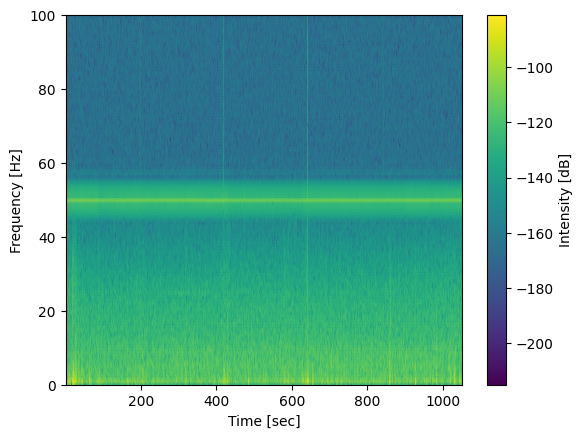

In [28]:
# Define the sampling frequency
fs = raw.info['sfreq']

# Generate the spectrogram
frequencies, times, Sxx = spectrogram(channel_data, fs)

# Plot the spectrogram
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar(label='Intensity [dB]')
plt.show()
